In [1]:
import pandas as pd
from sqlalchemy import create_engine
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb()
import datetime
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

## E - Extracting Data

In [2]:
#reading csv file for airbnb listings

listings_file = "Resources/listings.csv"
listings_data = pd.read_csv(listings_file)
listings_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [3]:
listings_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1B",1169,Holly,NaN,Western Addition,37.769310,-122.433856,Entire home/apt,170,1,156,8/19/2018,1.40,1,119
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.745112,-122.421018,Entire home/apt,235,30,112,8/6/2017,0.98,1,365
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.766690,-122.452505,Private room,65,32,17,11/21/2016,0.15,9,365
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.764872,-122.451828,Private room,65,32,7,8/12/2017,0.14,9,361
4,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.775249,-122.436374,Entire home/apt,675,7,27,8/11/2018,0.25,2,82


In [4]:
#removing columns that are not needed in the df

new_listings_df = listings_data[['name', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'number_of_reviews']]
new_listings_df.head()

,name,neighbourhood,latitude,longitude,room_type,price,number_of_reviews
0,"Bright, Modern Garden Unit - 1BR/1B",Western Addition,37.769310,-122.433856,Entire home/apt,170,156
1,Creative Sanctuary,Bernal Heights,37.745112,-122.421018,Entire home/apt,235,112
2,A Friendly Room - UCSF/USF - San Francisco,Haight Ashbury,37.766690,-122.452505,Private room,65,17
3,Friendly Room Apt. Style -UCSF/USF - San Franc...,Haight Ashbury,37.764872,-122.451828,Private room,65,7
4,Historic Alamo Square Victorian,Western Addition,37.775249,-122.436374,Entire home/apt,675,27


In [5]:
# dropping na values

new_list_df = new_listings_df.dropna()
new_list_df.count()

name                 6529
neighbourhood        6529
latitude             6529
longitude            6529
room_type            6529
price                6529
number_of_reviews    6529
dtype: int64

In [6]:
# clean dataframe for listings

new_list_df = new_list_df.rename(columns={'name': 'Name', 'neighbourhood': 'Neighborhood', 'latitude': 'Latitude', 'longitude': 'Longitude', 'room_type': 'Room Type', 'price': 'Price', 'number_of_reviews':'Number_of_Reviews' })
new_list_df.head()

,Name,Neighborhood,Latitude,Longitude,Room Type,Price,Number_of_Reviews
0,"Bright, Modern Garden Unit - 1BR/1B",Western Addition,37.769310,-122.433856,Entire home/apt,170,156
1,Creative Sanctuary,Bernal Heights,37.745112,-122.421018,Entire home/apt,235,112
2,A Friendly Room - UCSF/USF - San Francisco,Haight Ashbury,37.766690,-122.452505,Private room,65,17
3,Friendly Room Apt. Style -UCSF/USF - San Franc...,Haight Ashbury,37.764872,-122.451828,Private room,65,7
4,Historic Alamo Square Victorian,Western Addition,37.775249,-122.436374,Entire home/apt,675,27


In [7]:
# reading csv file for crimes in San Francisco

crime_file = "Resources/sf_crime.csv"
crime_db = pd.read_csv(crime_file)
crime_db.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point
0,1/1/2018 1:30,1/1/2018,1:30,2018,Monday,1/1/2018 2:13,61870203073,618702,180000263,180010563.0,...,"Robbery, W/ Other Weapon",Open or Active,JUSTIN DR \ COLLEGE AVE,21236000.0,Ingleside,Bernal Heights,9.0,37.732261,-122.423486,"(37.732261252752224, -122.42348641495892)"
1,1/1/2018 1:59,1/1/2018,1:59,2018,Monday,1/1/2018 1:59,61870768000,618707,180000326,180010504.0,...,Fire Report,Open or Active,16TH ST \ MISSION ST,24170000.0,Mission,Mission,9.0,37.765051,-122.419669,"(37.76505133632968, -122.41966897380142)"
2,1/1/2018 2:28,1/1/2018,2:28,2018,Monday,1/1/2018 2:31,61870904134,618709,180000348,180010636.0,...,Battery,Open or Active,03RD ST \ PERRY ST,20657000.0,Southern,South of Market,6.0,37.782119,-122.396841,"(37.78211912156566, -122.39684142850209)"
3,1/1/2018 2:28,1/1/2018,2:28,2018,Monday,1/1/2018 2:31,61870928160,618709,180000348,180010636.0,...,"Malicious Mischief, Vandalism to Vehicle",Open or Active,03RD ST \ PERRY ST,20657000.0,Southern,South of Market,6.0,37.782119,-122.396841,"(37.78211912156566, -122.39684142850209)"
4,1/1/2018 2:08,1/1/2018,2:08,2018,Monday,1/1/2018 2:08,61871004014,618710,180000285,180010537.0,...,"Assault, Aggravated, W/ Force",Cite or Arrest Adult,CESAR CHAVEZ ST \ CAPP ST \ MISSION ST,21304000.0,Mission,Bernal Heights,9.0,37.748166,-122.418221,"(37.74816568813204, -122.41822117169174)"


In [8]:
#dropping columns that are not required

crime = crime_db[['Incident Date', 'Incident Year', 'Analysis Neighborhood', 'Incident Description', 'Latitude', 'Longitude']]
crime.count()

Incident Date            111531
Incident Year            111531
Analysis Neighborhood    105913
Incident Description     111531
Latitude                 105956
Longitude                105956
dtype: int64

In [9]:
#dropping na values

crime = crime.dropna()
crime.count()

Incident Date            105913
Incident Year            105913
Analysis Neighborhood    105913
Incident Description     105913
Latitude                 105913
Longitude                105913
dtype: int64

In [10]:
crime.head()

,Incident Date,Incident Year,Analysis Neighborhood,Incident Description,Latitude,Longitude
0,1/1/2018,2018,Bernal Heights,"Robbery, W/ Other Weapon",37.732261,-122.423486
1,1/1/2018,2018,Mission,Fire Report,37.765051,-122.419669
2,1/1/2018,2018,South of Market,Battery,37.782119,-122.396841
3,1/1/2018,2018,South of Market,"Malicious Mischief, Vandalism to Vehicle",37.782119,-122.396841
4,1/1/2018,2018,Bernal Heights,"Assault, Aggravated, W/ Force",37.748166,-122.418221


In [11]:
#re-naming Analysis Neighborhood to Neighborhood

crime = crime.rename(columns={'Analysis Neighborhood': 'Neighborhood'})
crime.head()

,Incident Date,Incident Year,Neighborhood,Incident Description,Latitude,Longitude
0,1/1/2018,2018,Bernal Heights,"Robbery, W/ Other Weapon",37.732261,-122.423486
1,1/1/2018,2018,Mission,Fire Report,37.765051,-122.419669
2,1/1/2018,2018,South of Market,Battery,37.782119,-122.396841
3,1/1/2018,2018,South of Market,"Malicious Mischief, Vandalism to Vehicle",37.782119,-122.396841
4,1/1/2018,2018,Bernal Heights,"Assault, Aggravated, W/ Force",37.748166,-122.418221


## T - Transforming Data

## Price vs. Number of Crimes in the Neighborhood

In [12]:
# finding relationship between price of a listing and number of crimes in the neighborhood

grouped_by_neighborhood = crime.groupby(['Neighborhood'])
#grouped_by_neighborhood.head()

In [13]:
#number of crimes in every neighborhood

number_of_crimes = grouped_by_neighborhood['Incident Description'].count()
number_of_crimes_db = pd.DataFrame(number_of_crimes)
number_of_crimes_db = number_of_crimes_db.rename(columns={'Incident Description': 'Crimes'}) 
number_of_crimes_db.head()

,Crimes
Neighborhood,
Bayview Hunters Point,6008
Bernal Heights,1819
Castro/Upper Market,3352
Chinatown,2069
Excelsior,1807


In [14]:
#average price of listings in every neighborhoods

price_by_neighborhood = new_list_df.groupby(['Neighborhood'])
avg_price_by_neighborhood = price_by_neighborhood['Price'].mean()
avg_price_by_neighborhood = pd.DataFrame(avg_price_by_neighborhood)
avg_price_by_neighborhood.head()

,Price
Neighborhood,
Bayview,134.033333
Bernal Heights,175.089136
Castro/Upper Market,251.606599
Chinatown,185.773913
Crocker Amazon,154.210526


In [15]:
#merging the two dataframes to find corelation between number of crimes and price in a neighborhood

price_vs_crimes = number_of_crimes_db.merge(avg_price_by_neighborhood, how='outer', left_index=True, right_index=True)
price_vs_crimes = price_vs_crimes.dropna()  
price_vs_crimes_df = price_vs_crimes.reset_index()

price_vs_crimes_df['id'] = price_vs_crimes_df.index + 1
#price_vs_crimes_df.head()
price_vs_crimes_df = price_vs_crimes_df [["id","Neighborhood","Crimes", "Price"]]
price_vs_crimes_df.head()
#price_vs_crimes_df.sort_values(by='Number of Crimes', ascending=False)

,id,Neighborhood,Crimes,Price
0,1,Bernal Heights,1819.0,175.089136
1,2,Castro/Upper Market,3352.0,251.606599
2,3,Chinatown,2069.0,185.773913
3,4,Excelsior,1807.0,120.181818
4,5,Glen Park,524.0,226.742424


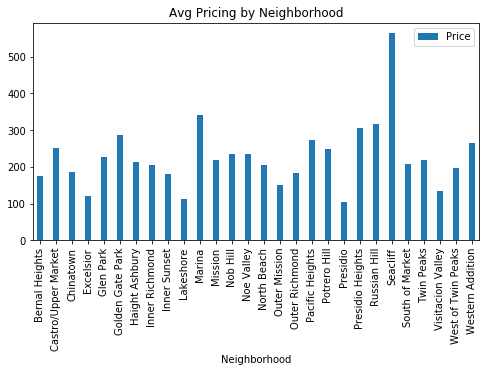

In [16]:
price_vs_crimes_df.plot(x="Neighborhood", y=["Price"], kind="bar",width= 0.4, figsize = (8,4), title = "Avg Pricing by Neighborhood")
#price_vs_crimes_df.plot(x="Neighborhood", y=["Number_of_Crimes"],color='red', kind="bar",width=0.4, figsize = (8,4), title = "No. of Crimes by Neighborhood")
plt.savefig ("Images/Avg Pricing by Neighborhood.png")

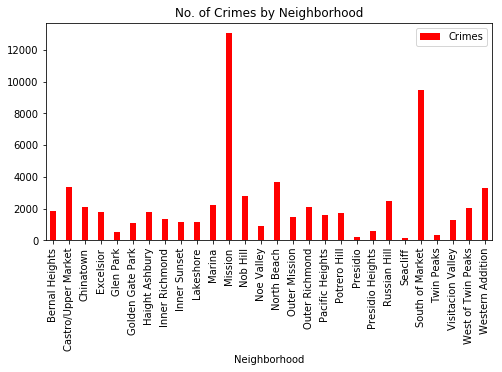

In [17]:
price_vs_crimes_df.plot(x="Neighborhood", y=["Crimes"],color='red', kind="bar",width=0.4, figsize = (8,4), title = "No. of Crimes by Neighborhood")
plt.savefig ("Images/No of Crimes by Neighborhood.png")

## Type of Incidents by Neighborhoods

In [18]:
#Type of incidents by Neighborhoods

grouped_by_descriptions = crime.groupby(['Incident Description','Neighborhood']).count()

grouped_by_descriptions = grouped_by_descriptions.rename(columns={'Incident Date': 'Number_of_Crimes'}) 
grouped_by_descriptions_db = grouped_by_descriptions[['Number_of_Crimes']]
df_crime = grouped_by_descriptions_db.reset_index()

df_crime['id'] = df_crime.index + 1

df_crime.head()

,Incident Description,Neighborhood,Number_of_Crimes,id
0,ATM-related Crime (secondary code only),Chinatown,2,1
1,ATM-related Crime (secondary code only),Financial District/South Beach,2,2
2,ATM-related Crime (secondary code only),Lone Mountain/USF,1,3
3,ATM-related Crime (secondary code only),Marina,1,4
4,ATM-related Crime (secondary code only),Mission Bay,1,5


## Price vs. No of Reviews

In [19]:
# Average reviews & price by listing type (Entire home/apt, Private room, Shared room) in every neighborhood

price_by_neighborhood = new_list_df.groupby(['Neighborhood','Room Type'])

hood_df = price_by_neighborhood.mean()
price_vs_neighborhood = hood_df[['Price', 'Number_of_Reviews']] 
price_vs_neighborhood_df = price_vs_neighborhood.reset_index()


price_vs_neighborhood_df['id'] = price_vs_neighborhood_df.index + 1
price_vs_neighborhood_df.head()

,Neighborhood,Room Type,Price,Number_of_Reviews,id
0,Bayview,Entire home/apt,161.660000,49.540000,1
1,Bayview,Private room,115.202899,55.826087,2
2,Bayview,Shared room,52.000000,92.000000,3
3,Bernal Heights,Entire home/apt,215.365639,42.942731,4
4,Bernal Heights,Private room,106.030534,65.641221,5


## Price vs. Type of Listing (entire home, private room & shared room)

In [20]:
# Average price in SF by listing type

price_by_roomtype = new_list_df.groupby(['Room Type'])
room_df = price_by_roomtype.mean()
price_vs_room = room_df[['Price', 'Number_of_Reviews']]
price_vs_room_df = price_vs_room.reset_index()
price_vs_room_df['id'] = price_vs_room_df.index + 1
price_vs_room_df.head()

,Room Type,Price,Number_of_Reviews,id
0,Entire home/apt,268.743564,36.248864,1
1,Private room,132.618136,53.946755,2
2,Shared room,69.607362,44.656442,3


## Crime Rate by Month

In [21]:
number_crimes = crime.copy()

In [22]:
number_crimes['Month'] = pd.DatetimeIndex(number_crimes['Incident Date']).month
number_crimes.head()

,Incident Date,Incident Year,Neighborhood,Incident Description,Latitude,Longitude,Month
0,1/1/2018,2018,Bernal Heights,"Robbery, W/ Other Weapon",37.732261,-122.423486,1
1,1/1/2018,2018,Mission,Fire Report,37.765051,-122.419669,1
2,1/1/2018,2018,South of Market,Battery,37.782119,-122.396841,1
3,1/1/2018,2018,South of Market,"Malicious Mischief, Vandalism to Vehicle",37.782119,-122.396841,1
4,1/1/2018,2018,Bernal Heights,"Assault, Aggravated, W/ Force",37.748166,-122.418221,1


In [23]:
number_crimes= number_crimes.groupby("Month").count()
#number_crimes.head()

In [24]:
number_crimes = number_crimes [["Incident Description"]]
number_crimes.head()

,Incident Description
Month,
1,12420
2,11320
3,12022
4,11939
5,12323


In [25]:
no_of_crimes = number_crimes.rename(columns={'Incident Description': 'Number_of_Incidents'})
no_of_crimes=no_of_crimes.reset_index()
no_of_crimes

,Month,Number_of_Incidents
0,1,12420
1,2,11320
2,3,12022
3,4,11939
4,5,12323
5,6,11755
6,7,13023
7,8,12720
8,9,8391


In [26]:
# getting month name from month number

import calendar

no_of_crimes['Month'] = no_of_crimes['Month'].apply(lambda x: calendar.month_abbr[x])
no_of_crimes["id"] = no_of_crimes.index + 1
no_of_crimes

,Month,Number_of_Incidents,id
0,Jan,12420,1
1,Feb,11320,2
2,Mar,12022,3
3,Apr,11939,4
4,May,12323,5
5,Jun,11755,6
6,Jul,13023,7
7,Aug,12720,8
8,Sep,8391,9


## Price vs. Popularity of the Listing (number of reviews)

In [39]:
#Popularity by maximum number of reviews

price_pop_hood = new_list_df[['Neighborhood', 'Number_of_Reviews', 'Price']]
#price_pop_hood = price_pop_hood.rename ({'Number_of_Reviews': 'Reviews'})
price_pop_hood.head()

,Neighborhood,Number_of_Reviews,Price
0,Western Addition,156,170
1,Bernal Heights,112,235
2,Haight Ashbury,17,65
3,Haight Ashbury,7,65
4,Western Addition,27,675


In [28]:
new_price_pop_hood = price_pop_hood.groupby(['Neighborhood'])
new_pop_vs_price = new_price_pop_hood.mean()

new_pop_vs_price_df = new_pop_vs_price.reset_index()
new_pop_vs_price_df['id'] = new_pop_vs_price_df.index + 1
#new_pop_vs_price_df = new_pop_vs_price_df.rename ({"Number_of_Reviews":"Reviews"})

new_pop_vs_price_df.head()

,Neighborhood,Number_of_Reviews,Price,id
0,Bayview,53.508333,134.033333,1
1,Bernal Heights,51.253482,175.089136,2
2,Castro/Upper Market,50.289340,251.606599,3
3,Chinatown,5.608696,185.773913,4
4,Crocker Amazon,45.421053,154.210526,5


## L -Loading Data

In [29]:
connection_string = "root:password@localhost/etl"
engine = create_engine(f'mysql://{connection_string}')

In [30]:
price_vs_crimes_df.to_sql(name='price_vs_crimes', con=engine, if_exists='append', index=False)

In [31]:
new_pop_vs_price_df.to_sql(name='new_pop_vs_price', con=engine, if_exists='append', index=False)

In [32]:
no_of_crimes.to_sql(name='no_of_crimes', con=engine, if_exists='append', index=False)

In [33]:
price_vs_room_df.to_sql(name='price_vs_room', con=engine, if_exists='append', index=False)

In [34]:
price_vs_neighborhood_df.to_sql(name='price_vs_neighborhood', con=engine, if_exists='append', index=False)

In [35]:
df_crime.to_sql(name='df_crime', con=engine, if_exists='append', index=False)

In [36]:
engine.table_names()

['df_crime',
 'new_pop_vs_price',
 'no_of_crimes',
 'price_vs_crimes',
 'price_vs_neighborhood',
 'price_vs_room']